## quickstart

In [1]:
import optiland

from optiland.samples.objectives import ReverseTelephoto
lens = ReverseTelephoto()
lens.draw3D()

## Optiland for Beginners——create a singlet len

In [2]:
import numpy as np
from optiland import optic

singlet = optic.Optic()

# define surfaces
singlet.add_surface(index=0, radius=np.inf, thickness=np.inf)
singlet.add_surface(index=1, radius=20, thickness=7, is_stop=True, material="N-SF11")
singlet.add_surface(index=2, radius=np.inf, thickness=18)
singlet.add_surface(index=3, radius=30, thickness=5)

# define aperture
singlet.set_aperture(aperture_type="EPD", value=25)

# define fields
singlet.set_field_type(field_type="angle")
singlet.add_field(y=0)

# define wavelengths
singlet.add_wavelength(value=0.5, is_primary=True)

# view in 3D - Note this opens a new window, but we add a photo below to
# show the visualization
singlet.draw3D()

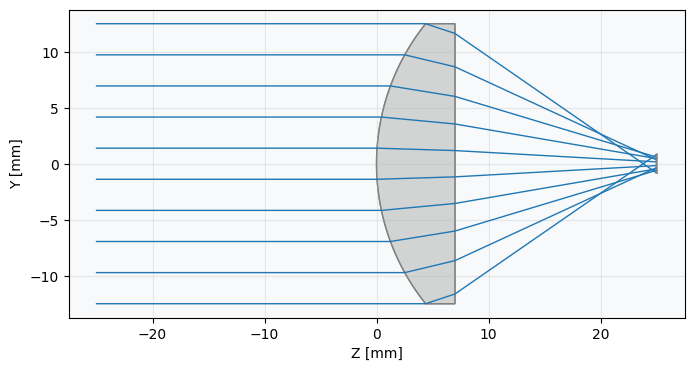

In [3]:
# view in 2D
singlet.draw(num_rays=10)

## Determining Lens Properties

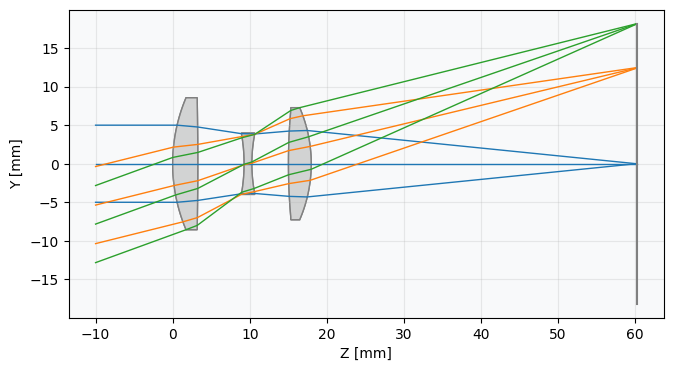

In [4]:
from optiland.samples.objectives import CookeTriplet
lens = CookeTriplet()
lens.draw()

In [5]:
print(f"Front focal length: {lens.paraxial.f1():.1f} mm")
print(f"Focal length: {lens.paraxial.f2():.1f} mm")
print(f"Front focal point: {lens.paraxial.F1():.1f} mm")
print(f"Back focal point: {lens.paraxial.F2():.1f} mm")
print(f"Front principal plane: {lens.paraxial.P1():.1f} mm")
print(f"Back principal plane: {lens.paraxial.P2():.1f} mm")
print(f"Front nodal plane: {lens.paraxial.N1():.1f} mm")
print(f"Back nodal plane: {lens.paraxial.N2():.1f} mm")

Front focal length: -50.0 mm
Focal length: 50.0 mm
Front focal point: -37.3 mm
Back focal point: 0.2 mm
Front principal plane: 12.7 mm
Back principal plane: -49.8 mm
Front nodal plane: 12.7 mm
Back nodal plane: -49.8 mm


In [6]:
print(f"Entrance pupil diameter: {lens.paraxial.EPD():.1f} mm")
print(f"Exit pupil diameter: {lens.paraxial.XPD():.1f} mm")
print(f"Entrance pupil position: {lens.paraxial.EPL():.1f} mm")
print(f"Exit pupil position: {lens.paraxial.XPL():.1f} mm")
print(f"Image-space F-Number: {lens.paraxial.FNO():.1f}")
print(f"Magnification: {lens.paraxial.magnification():.1f}")
print(f"Invariant: {lens.paraxial.invariant():.3f}")

Entrance pupil diameter: 10.0 mm
Exit pupil diameter: 10.2 mm
Entrance pupil position: 11.5 mm
Exit pupil position: -51.0 mm
Image-space F-Number: 5.0
Magnification: -0.0
Invariant: -1.820


In [7]:
print("Marginal Ray: ")  ##边缘光线

ya, ua = lens.paraxial.marginal_ray()
for k in range(len(ya)):
    print(f"\tSurface {k}: y = {ya[k, 0]:.3f}, u = {ua[k, 0]:.3f}")

Marginal Ray: 
	Surface 0: y = 5.000, u = 0.000
	Surface 1: y = 5.000, u = -0.087
	Surface 2: y = 4.716, u = -0.148
	Surface 3: y = 3.826, u = -0.025
	Surface 4: y = 3.801, u = 0.076
	Surface 5: y = 4.162, u = 0.027
	Surface 6: y = 4.242, u = -0.100
	Surface 7: y = 0.021, u = -0.100


In [8]:
print("Chief Ray: ")    ## 主光线

yb, ub = lens.paraxial.chief_ray()
for k in range(len(yb)):
    print(f"\tSurface {k}: y = {yb[k, 0]:.3f}, u = {ub[k, 0]:.3f}")

Chief Ray: 
	Surface 0: y = -4.190, u = 0.364
	Surface 1: y = -4.190, u = 0.297
	Surface 2: y = -3.221, u = 0.487
	Surface 3: y = -0.295, u = 0.295
	Surface 4: y = -0.000, u = 0.479
	Surface 5: y = 2.275, u = 0.284
	Surface 6: y = 3.113, u = 0.356
	Surface 7: y = 18.125, u = 0.356


## Saving and Loading Optiland Files

In [7]:
from optiland.fileio import load_optiland_file, save_optiland_file
from optiland.samples.microscopes import UVReflectingMicroscope

c:\Users\zrk\miniconda3\envs\optiland\lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\zrk\miniconda3\envs\optiland\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
c:\Users\zrk\miniconda3\envs\optiland\lib\site-packages\optiland\geometries\standard.py:66: RuntimeWarning: invalid value encountered in sqrt
  self.radius * (1 + be.sqrt(1 - (1 + self.k) * r2 / self.radius**2))


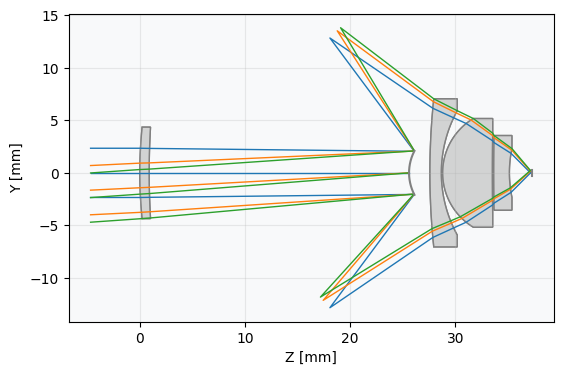

In [9]:
system = UVReflectingMicroscope()
system.draw()

c:\Users\zrk\miniconda3\envs\optiland\lib\site-packages\numpy\core\function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\zrk\miniconda3\envs\optiland\lib\site-packages\numpy\core\function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
c:\Users\zrk\miniconda3\envs\optiland\lib\site-packages\optiland\geometries\standard.py:66: RuntimeWarning: invalid value encountered in sqrt
  self.radius * (1 + be.sqrt(1 - (1 + self.k) * r2 / self.radius**2))


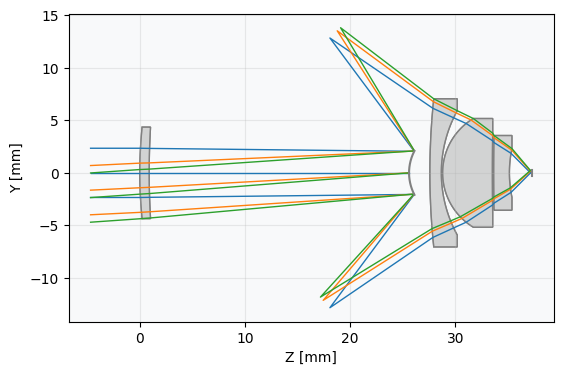

In [10]:
save_optiland_file(system, "uv_reflecting_microscope.json")

new_system = load_optiland_file("uv_reflecting_microscope.json")
new_system.draw()

## Material Database Tutorial

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from optiland.materials import AbbeMaterial, IdealMaterial, Material

In [13]:
## Ideal Material
ideal_material = IdealMaterial(n=1.5, k=0) # 固定折射率和消光系数

wavelengths = [0.48, 0.55, 0.65]

for wavelength in wavelengths:
    print(f"Refractive Index at {wavelength} µm: {ideal_material.n(wavelength)}")
    print(
        f"Extinction Coefficient at {wavelength} µm: {ideal_material.k(wavelength)}",
        end="\n\n",
    )

Refractive Index at 0.48 µm: [1.5]
Extinction Coefficient at 0.48 µm: [0.]

Refractive Index at 0.55 µm: [1.5]
Extinction Coefficient at 0.55 µm: [0.]

Refractive Index at 0.65 µm: [1.5]
Extinction Coefficient at 0.65 µm: [0.]



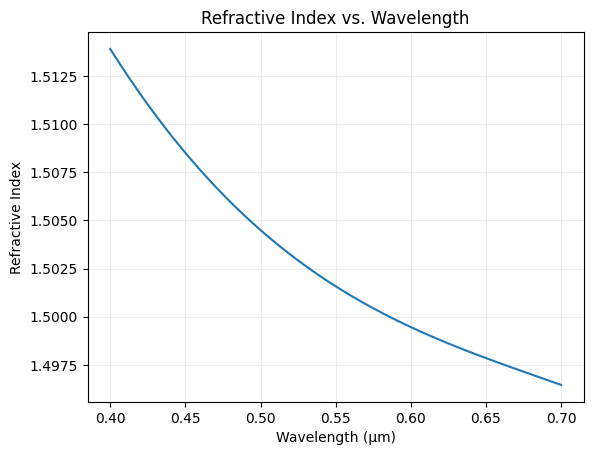

In [14]:
# abbe_material = AbbeMaterial(n=1.5, abbe=65.0) # 固定折射率和阿贝数，消光系数默认为0
abbe_material = AbbeMaterial(n=1.5, abbe=65.0)

wavelengths = np.linspace(0.4, 0.7, 256)

n_abbe = abbe_material.n(wavelengths)

plt.plot(wavelengths, n_abbe)
plt.xlabel("Wavelength (µm)")
plt.ylabel("Refractive Index")
plt.title("Refractive Index vs. Wavelength")
plt.grid(alpha=0.25)
plt.show()

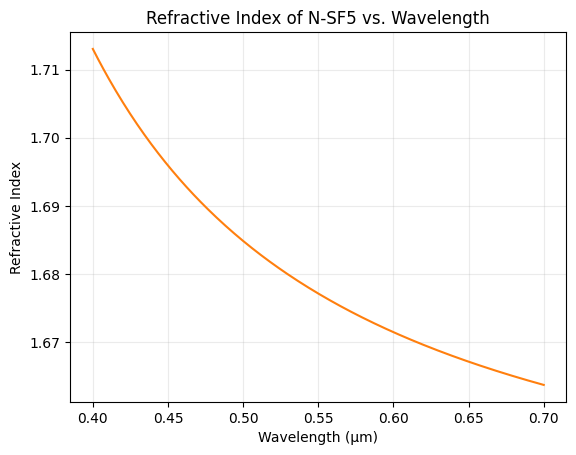

In [15]:
## material class
# glass = Material("N-SF5")
glass = Material("N-SF5", reference="Schott") # 可以指定材料库

n_sf5 = glass.n(wavelengths)    # 计算折射率

plt.plot(wavelengths, n_sf5, "C1")
plt.xlabel("Wavelength (µm)")
plt.ylabel("Refractive Index")
plt.title("Refractive Index of N-SF5 vs. Wavelength")
plt.grid(alpha=0.25)
plt.show()

In [16]:
# 有机材料
DNA = Material("DNA")

wavelength = 0.26

# call `.item()` to get the value as a scalar
print(f"Refractive Index of DNA at {wavelength} µm: {DNA.n(wavelength).item():.5f}")

Refractive Index of DNA at 0.26 µm: 1.65214


In [17]:
# 其他材料
silver_chloride = Material("AgCl")
toluene = Material("toluene")   #甲苯

wavelength = 0.55

print(
    f"Refractive Index of AgCl at {wavelength} µm: {silver_chloride.n(wavelength).item():.5f}",
)
print(
    f"Refractive Index of toluene at {wavelength} µm: {toluene.n(wavelength).item():.5f}"
)

Refractive Index of AgCl at 0.55 µm: 2.07748
Refractive Index of toluene at 0.55 µm: 1.50006


In [18]:
# 气体材料
he = Material("He")

wavelength = 0.612

print(f"Refractive Index of He at {wavelength} µm: {he.n(wavelength).item():.7f}")

Refractive Index of He at 0.612 µm: 1.0000349


## Non-rotationally Symmetric Systems

In [2]:
import numpy as np

from optiland import analysis, optic, optimization

In [5]:
lens = optic.Optic()

# System settings
lens.set_aperture(aperture_type="EPD", value=5.0)
lens.set_field_type(field_type="angle")
lens.add_field(y=-0.5)
lens.add_field(y=0)
lens.add_field(y=0.5)
lens.add_wavelength(value=0.633, is_primary=True)

# Lens data
lens.add_surface(index=0, radius=np.inf, z=-np.inf)
lens.add_surface(index=1, z=0)
lens.add_surface(index=2, z=10, material="bk7", surface_type="standard")  # material in
lens.add_surface(index=3, z=15, material="air", surface_type="standard")  # material out
lens.add_surface(
    index=4, z=25, material="mirror", rx=-np.pi / 4, is_stop=True
)  # first mirror
lens.add_surface(
    index=5, z=25, y=-15, material="mirror", rx=-np.pi / 4
)  # second mirror
lens.add_surface(index=6, z=45, y=-15, material="mirror", rx=np.pi / 4)  # third mirror
lens.add_surface(
    index=7, z=45, y=-10, radius=-30, material="bk7", rx=np.pi / 2
)  # material in
lens.add_surface(
    index=8, z=45, y=-5, radius=30, material="air", rx=np.pi / 2
)  # material out
lens.add_surface(index=9, z=45, y=10, material="mirror", rx=np.pi / 4)  # fourth mirror
lens.add_surface(index=10, z=55, y=10)  # Image plane

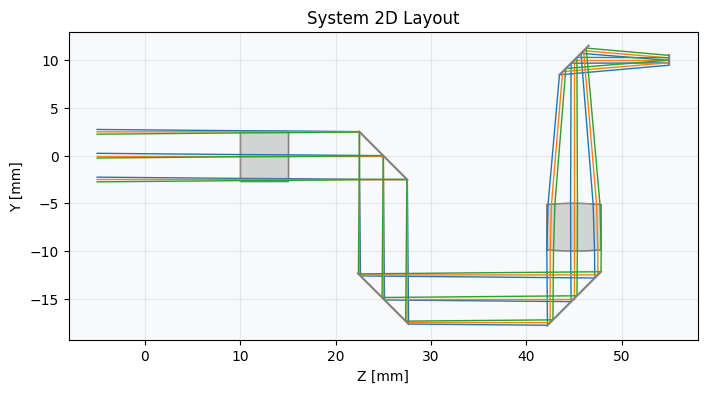

In [6]:
lens.draw(title="System 2D Layout")
lens.draw3D(num_rays=10)  # Opens in external window when you run the code

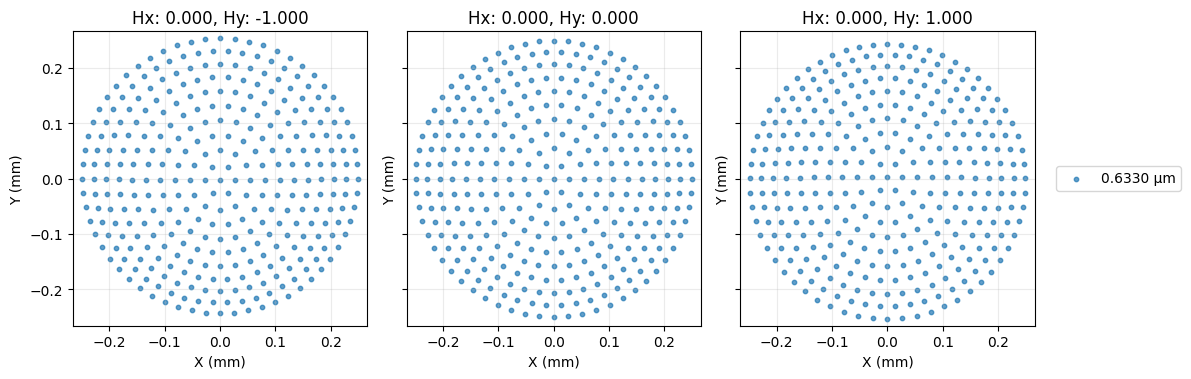

In [22]:
spot = analysis.SpotDiagram(lens, num_rings=10, distribution="hexapolar")
spot.view()

### Simple RMS Spot Optimization

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │             0.00643671 │           99.9334 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════════╤══════════════╤══════════╤═════════╤═════════╤════════════════╕
│    │ Operand Type   │   Target │ Min. Bound   │ Max. Bound   │   Weight │   Value │   Delta │   Contrib. [%] │
╞════╪════════════════╪══════════╪══════════════╪══════════════╪══════════╪═════════╪═════════╪════════════════╡
│  0 │ rms spot size  │        0 │              │              │       10 │   0.005 │   0.005 │          35.94 │
│  1 │ rms spot size  │        0 │              │              │       10 │   0.004 │   0.004 │          28.13 │
│  2 │ rms spot size  │        0 │              │              │       10 │   0.005 │   0.005 │          35.94 │
╘════╧════════════════╧══════════╧══════════════╧═════════════

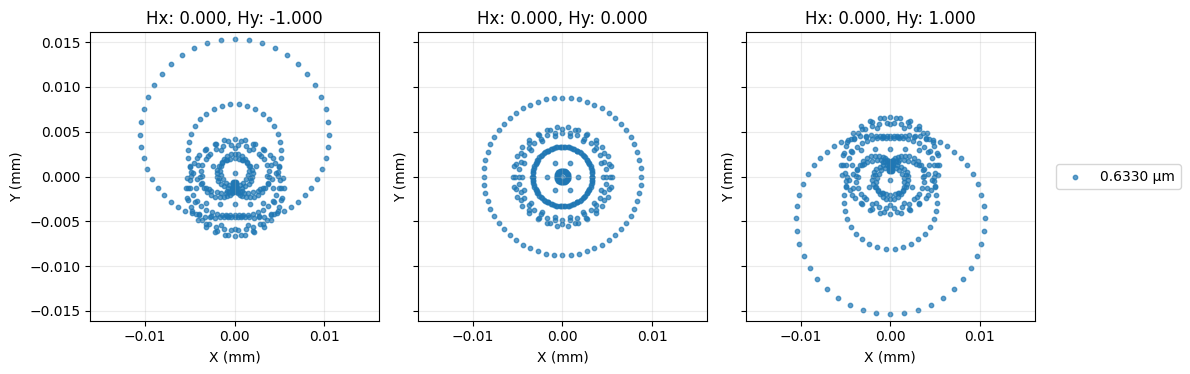

In [23]:
problem = optimization.OptimizationProblem()

# Variable Definition
# thicknesses
problem.add_variable(lens, "thickness", surface_number=9, min_val=10, max_val=20)

# RMS spot size - let's minimize the spot size for each field at the primary wavelength.
# We choose a 'uniform' distribution, so the number of rays actually means the rays
# along one axis.
for field in lens.fields.get_field_coords():
    input_data = {
        "optic": lens,
        "surface_number": -1,
        "Hx": field[0],
        "Hy": field[1],
        "num_rays": 16,
        "wavelength": 0.633,
        "distribution": "uniform",
    }
    problem.add_operand(
        operand_type="rms_spot_size",
        target=0.0,
        weight=10,
        input_data=input_data,
    )

# Local optimizer
optimizer = optimization.OptimizerGeneric(problem)
optimizer.optimize()
problem.info()

# Final spot diagram
spot = analysis.SpotDiagram(lens, num_rings=10, distribution="hexapolar")
spot.view()

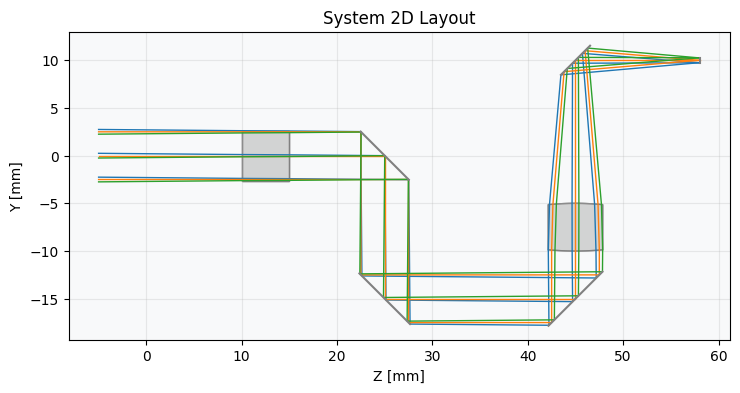

In [24]:
lens.draw(title="System 2D Layout")

## Differentiable Ray Tracing - Basics

In [4]:
# Begin by importing the backend module instead of numpy or torch directly
import optiland.backend as be

# set backend
be.set_backend("torch")
be.set_device(
    "cpu"
)  # we will stick to cpu for now. "cuda" is also possible for GPU calculations.
print(be.get_precision())  # check the precision

# enable the gradient mode: to tell autograd to begin recording operations on a Tensor tensor
be.grad_mode.enable()

torch.float32


In [3]:
from optiland.optic import Optic
from optiland.materials import Material
from optiland.analysis import SpotDiagram


class SingletConfigurable(Optic):
    """A configurable singlet lens."""

    def __init__(self, r1, r2, t2, material_name):
        super().__init__()
        ideal_material = Material(material_name)

        self.add_surface(index=0, radius=be.inf, thickness=be.inf)
        self.add_surface(
            index=1, thickness=7.0, radius=r1, is_stop=True, material=ideal_material
        )
        self.add_surface(index=2, radius=r2, thickness=t2)
        self.add_surface(index=3)

        self.set_aperture(aperture_type="EPD", value=25)

        self.set_field_type(field_type="angle")
        self.add_field(y=0.0)

        self.add_wavelength(value=0.55, is_primary=True)

TypeError: linspace(): argument 'start' (position 1) must be Number, not Tensor

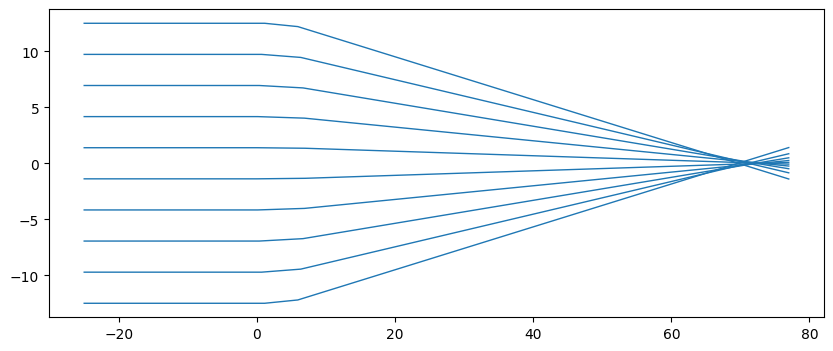

In [15]:
# be.set_backend("numpy")   #  switch back to numpy backend
# be.set_backend("torch")   #  switch to torch backend
lens = SingletConfigurable(r1=70.0, r2=-70.0, t2=70.0, material_name="BK7")
lens.draw(num_rays=10)
lens.info()


Initial RMS Spot Radius: 0.9442 mm


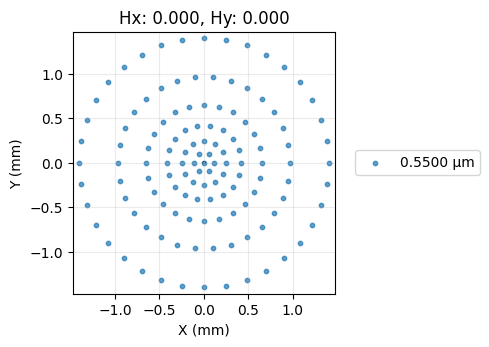

In [6]:
# RMS Spot Size Analysis
spot_diagram = SpotDiagram(lens)
rms_value = spot_diagram.rms_spot_radius()
print(f"\nInitial RMS Spot Radius: {rms_value[0][0]:.4f} mm")

# Spot Diagram visualization
spot_diagram.view(add_airy_disk=True)

In [7]:
import torch.optim as optim

# --- Parameter Handling ---

# Get initial values
radius1_param = lens.surface_group.surfaces[1].geometry.radius
radius2_param = lens.surface_group.surfaces[2].geometry.radius
params_to_optimize = [radius1_param, radius2_param]
print(params_to_optimize)

[tensor(70., requires_grad=True), tensor(-70., requires_grad=True)]


In [8]:
learning_rate = 0.2  # Adjust as needed
optimizer = optim.Adam((params_to_optimize), lr=learning_rate)

In [9]:
# --- Loss Function ---
# The function to minimize is the RMS spot radius.
# We need a way to calculate this within the loop using the current tensor values.


def calculate_loss(lens):
    """Calculates the RMS spot radius for the current lens state."""
    rms_values_nested = SpotDiagram(lens).rms_spot_radius()
    rms_scalar = rms_values_nested[0][0]
    return rms_scalar


print("\nOptimization setup complete.")
print(f"Optimizing: R1, R2")
print(f"Initial values: (R1={radius1_param:.2f}, R2={radius2_param:.2f})")


# --- Optimization Loop ---
# We run the standard PyTorch training loop.

num_iterations = 100
print("\nStarting optimization...")
losses = []
for i in range(num_iterations):
    optimizer.zero_grad()

    # --- Calculate Loss ---
    loss = calculate_loss(lens)
    losses.append(loss.item())
    # --- Backpropagation and Optimization Step ---
    loss.backward()  # Calculate gradients
    optimizer.step()  # Update tensors based on gradients

    # --- Print Progress ---
    if (i + 1) % 25 == 0:
        print(
            f"Iteration {i + 1}/{num_iterations}, Loss (RMS Spot Radius): {loss.item():.6f} mm"
        )
        print(f"  R1: {radius1_param.item():.4f}, R2: {radius2_param.item():.4f}")

print("Optimization finished.")


Optimization setup complete.
Optimizing: R1, R2
Initial values: (R1=70.00, R2=-70.00)

Starting optimization...
Iteration 25/100, Loss (RMS Spot Radius): 0.263034 mm
  R1: 74.9251, R2: -74.9241
Iteration 50/100, Loss (RMS Spot Radius): 0.127734 mm
  R1: 76.8283, R2: -76.8953
Iteration 75/100, Loss (RMS Spot Radius): 0.115021 mm
  R1: 76.3996, R2: -76.6142
Iteration 100/100, Loss (RMS Spot Radius): 0.114965 mm
  R1: 76.2613, R2: -76.6589
Optimization finished.


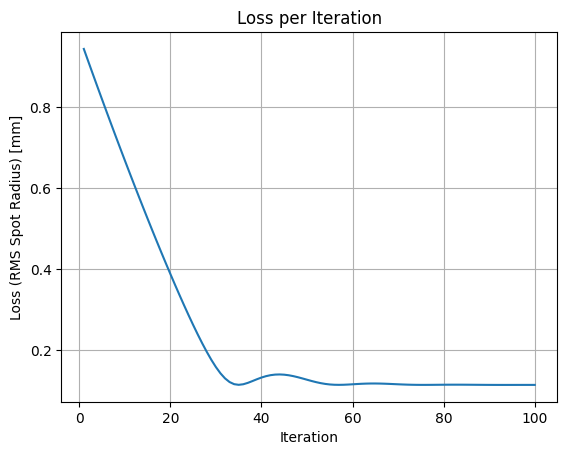

In [10]:
# --- Visualization of Loss per Epoch ---
import matplotlib.pyplot as plt

plt.figure()
plt.plot(range(1, num_iterations + 1), losses)
plt.xlabel("Iteration")
plt.ylabel("Loss (RMS Spot Radius) [mm]")
plt.title("Loss per Iteration")
plt.grid(True)
plt.show()

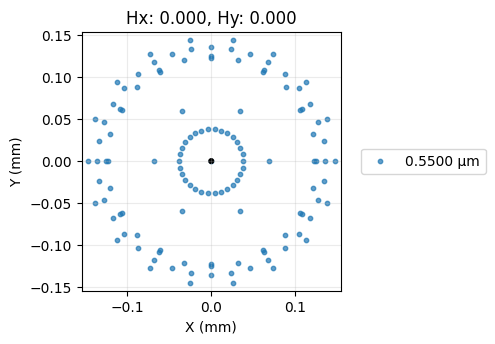

In [11]:
SpotDiagram(lens).view(add_airy_disk=True)

In [12]:
import optiland.backend as be
import torch
import numpy as np  # 确保可以导入 numpy

be.set_backend("torch")
be.set_device("cpu")

my_tensor = torch.tensor([1.0, 2.0, 3.0]).cpu()  # 将 Tensor 放到 CPU 上
numpy_array = be.to_numpy(my_tensor)  # 直接转换为 NumPy 数组

print(numpy_array)

[1. 2. 3.]
